In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.cluster
import sklearn.preprocessing
import sklearn.neural_network
import sklearn.linear_model
import sklearn.model_selection
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms

In [2]:
# baja y lee los datos
training = torchvision.datasets.FashionMNIST(root="./", train=True, download=True)
train_loader = torch.utils.data.DataLoader(training,shuffle=True)

testing = torchvision.datasets.FashionMNIST(root="./", train=False, download=True, 
                                            transform=torchvision.transforms.Normalize((0), (1.0)))
testing_loader = torch.utils.data.DataLoader(testing, shuffle=True)

torch.Size([60000, 28, 28])
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


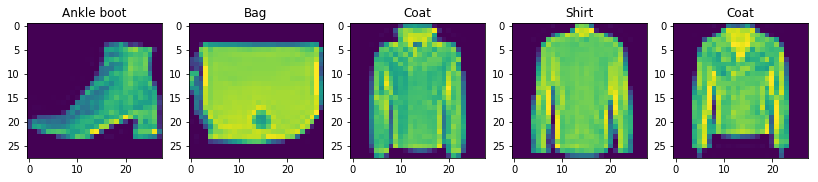

In [3]:
# muestra algunos ejemplos
print(train_loader.dataset.data.size())
print(train_loader.dataset.classes)
n_items = train_loader.dataset.data.size()[0]
random_items = np.random.choice(np.arange(n_items), 5)

plt.figure(figsize=(14,5))
for i in range(5):
    plt.subplot(1,5,i+1)
    item  = random_items[i]
    plt.imshow(train_loader.dataset.data[item])
    plt.title(train_loader.dataset.classes[train_loader.dataset.targets[item]] )

In [4]:
# Selecciona y normaliza 600 para entrenar
train  = train_loader.dataset.data[:600].float()
target = train_loader.dataset.targets[:600].float()

mean = train.mean(dim=0)
std = train.std(dim=0)
std[std==0]=1.0

for i in range(len(train)):
    train[i] = (train[i]-mean)/std
np.shape(train)

torch.Size([600, 28, 28])

In [5]:
x_train = train.unsqueeze(1)
n = torch.nn.Conv2d(1, 4, 4, stride=1) # in-channels = 1, out-channels = 4, kernel=4
new_tensor = n(x_train)
print(new_tensor.size())

torch.Size([600, 4, 25, 25])


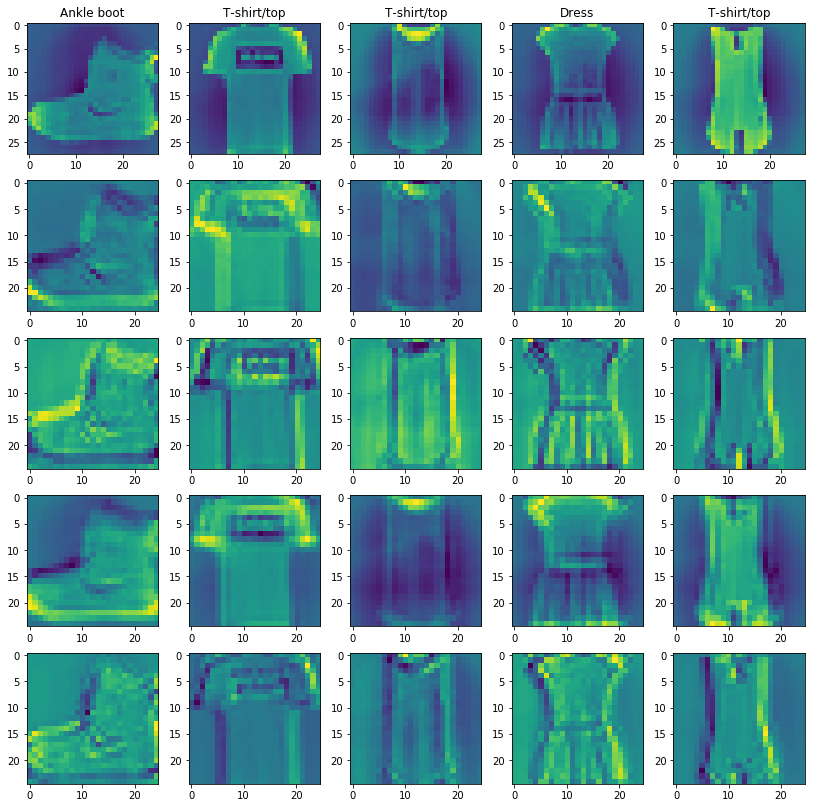

In [6]:
# muestra los resultados de las cuatro capas de convolucion
plt.figure(figsize=(14,14))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i][0].detach().numpy())
    plt.title(train_loader.dataset.classes[train_loader.dataset.targets[i]] )
    
    for j in range(4):
        plt.subplot(5,5,(i+1)+5*(j+1))
        plt.imshow(new_tensor[i][j].detach().numpy())
